# SENG 474 Final Project
# Simple Neural Network Model
This jupyter noteback file perfroms supervised machine learning via a neural network with a single hidden layer. This is ececuted by testing and plotting results of a regressor and classifier. Following, the classification model is analyzed for identified overfitting issues.

References:

1) https://keras.io/api/layers/

2) https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

3) https://keras.io/api/layers/regularization_layers/dropout/

4) https://keras.io/api/layers/regularizers/

In [1]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

np.random.seed(1337)


df = pd.read_csv("content/combined_data.csv")

y = df["weighted_average_vote"].astype(float)
X = df.drop(
    ["imdb_title_id", "title", "weighted_average_vote"],
    axis=1,
).astype(float)


In [2]:
# This function analyzes the model outcomes to tuning the number of hidden neurons in the hidden layer based on the researched methods identified in the report
def simpleNNRegression(X, y): 

    num_input = X.shape[1] # 956 dimensions
    num_samples = X.shape[0] # 22623 smaples
    num_output = 1 # 1 output neuron due to regression
    num_hidden_layers = 1 # 1 hidden layer in this NN


    # Researched methods for optimizing the number of neurons in the hidden layer
    num_hidden_neuron_methods = {
        'ShibataIkeda': int(np.sqrt(num_input * num_output)),
        'Trenn': int(num_input + num_output - 0.5),
        'JinchuanXinzhe': int(num_input + np.sqrt(num_samples) / num_hidden_layers)
    }

    results = []

    for method in num_hidden_neuron_methods: # analyze each method

        plt.figure(figsize=(12,12))
        plt.suptitle("5 Fold Cross Validation - Method for Number of Hidden Neurons to Use: " + method)
        subplot_idx = 1
        kf = KFold(n_splits=5, random_state=True, shuffle=True) # run 5-fold cross validation on the dataset
        kfold_results = {}
        for training_idx, testing_idx in kf.split(X):
            
            X_train, X_test = X.iloc[training_idx], X.iloc[testing_idx]
            y_train, y_test = y.iloc[training_idx], y.iloc[testing_idx]

            # scale the data
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model = keras.Sequential([
                keras.layers.Dense(num_hidden_neuron_methods[method], input_dim=num_input, activation='sigmoid', kernel_initializer='he_normal'), # single hidden layer
                keras.layers.Dense(num_output, activation="linear") # regression single neuron output layer
            ])

            model.compile(loss="mae", optimizer="adam")
            print('Model Summary - CV Split ' + str(subplot_idx))
            print(model.summary())

            losses = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # record the model history for plotting
            
            mae = min(losses['val_loss']) # find the minimum obtained MAE during validation testing
            kfold_results['cv_split_' + str(subplot_idx)] = {'val_mae': mae, 'num_hidden': num_hidden_neuron_methods[method], 'method': method, 'val_loss': losses['val_loss']}
            
            #plot the split's training and validation MAE over the 10 epochs
            plt.subplot(2,3,subplot_idx)
            plt.plot(losses['loss'])
            plt.plot(losses['val_loss'])
            plt.legend(['Training', 'Testing'], loc='upper right')
            plt.title('MAE Loss over 10 Epochs - CV Split ' + str(subplot_idx))
            plt.ylabel('MAE Loss')
            plt.xlabel('Epoch')
            subplot_idx += 1

        plt.draw()
        
        # Find and save the best performing 5-fold split for each method
        method_result = dict(sorted(kfold_results.items(), key=lambda result: result[1]['val_mae'], reverse=False))
        method_result = list(method_result.values())[0]
        results.append(method_result)
       
    plt.show()
    
    # Plot the validation MAE of the best 5-fold splits for each method
    for result in results:
        plt.plot(result['val_loss'], label=result['method'] + " - " + str(result['num_hidden']))

    plt.title('MAE Loss For Number Hidden Layer Neurons Methods')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(title="Method - # Neurons", loc="upper right")
    plt.show()

    best_method = min(results, key=lambda result: result['val_mae'])
    print("The most effective method for choosing the number of hidden layer neurons:")
    print("Method: "+ best_method['method'])
    print("Number of Hidden Neurons: "+ str(best_method['num_hidden']))
    print("Validation MAE: "+ str(best_method['val_mae']))
    print()

simpleNNRegression(X, y)

Model Summary - CV Split 1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                28710     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 28,741
Trainable params: 28,741
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


Epoch 1/10
19/19 [==============================] - 5s 121ms/step - loss: 0.2094 - accuracy: 0.2619 - val_loss: 0.0328 - val_accuracy: 0.3567
Epoch 2/10
19/19 [==============================] - 2s 106ms/step - loss: 0.0296 - accuracy: 0.4007 - val_loss: 0.0258 - val_accuracy: 0.3715
Epoch 3/10
19/19 [==============================] - 2s 100ms/step - loss: 0.0242 - accuracy: 0.4229 - val_loss: 0.0243 - val_accuracy: 0.3901
Epoch 4/10
19/19 [==============================] - 2s 97ms/step - loss: 0.0224 - accuracy: 0.4329 - val_loss: 0.0238 - val_accuracy: 0.3710
Epoch 5/10
19/19 [==============================] - 2s 98ms/step - loss: 0.0217 - accuracy: 0.4386 - val_loss: 0.0236 - val_accuracy: 0.3834
Epoch 6/10
19/19 [==============================] - 2s 98ms/step - loss: 0.0212 - accuracy: 0.4493 - val_loss: 0.0237 - val_accuracy: 0.3841
Epoch 7/10
19/19 [==============================] - 2s 99ms/step - loss: 0.0211 - accuracy: 0.4532 - val_loss: 0.0236 - val_accuracy: 0.3965
Epoch 8/10

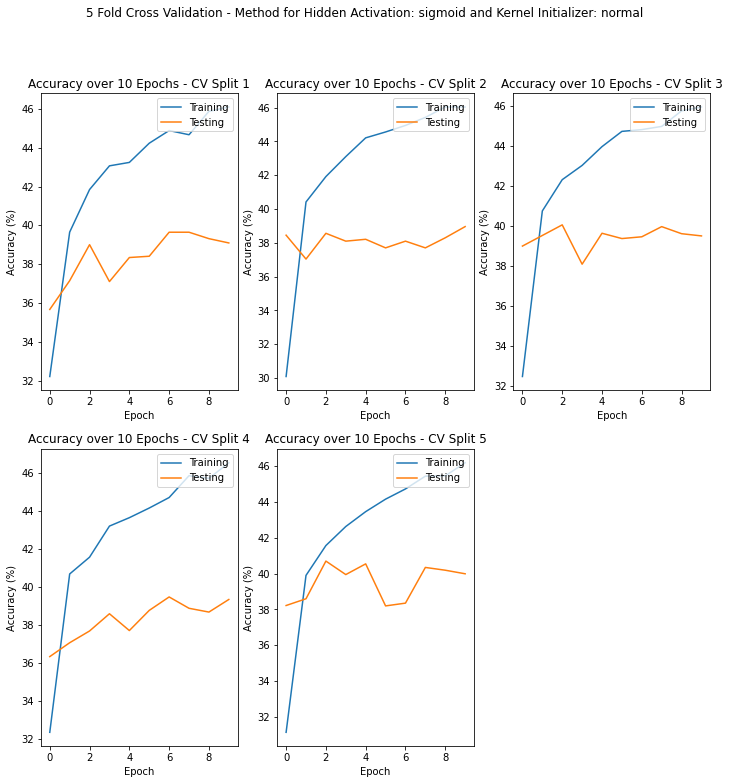

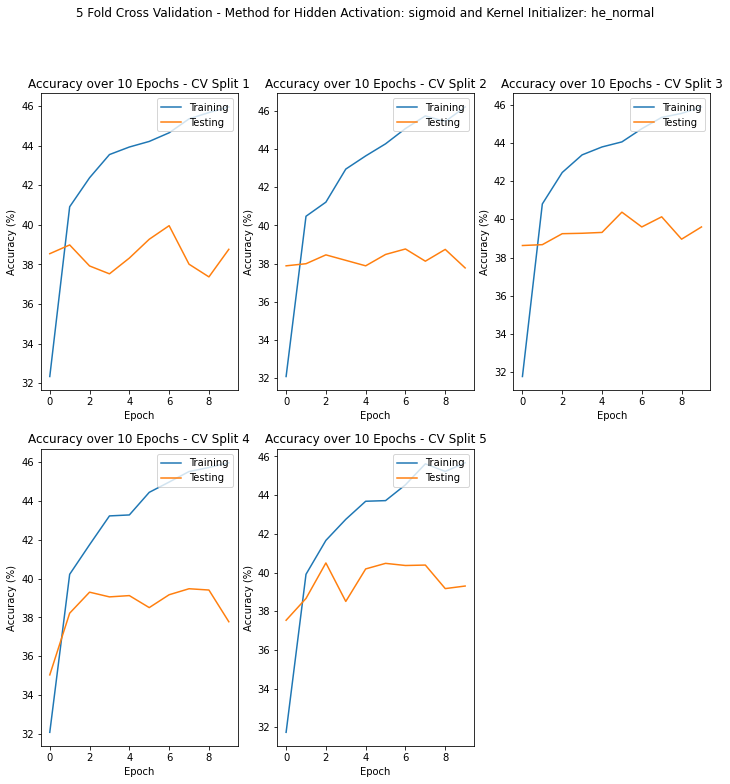

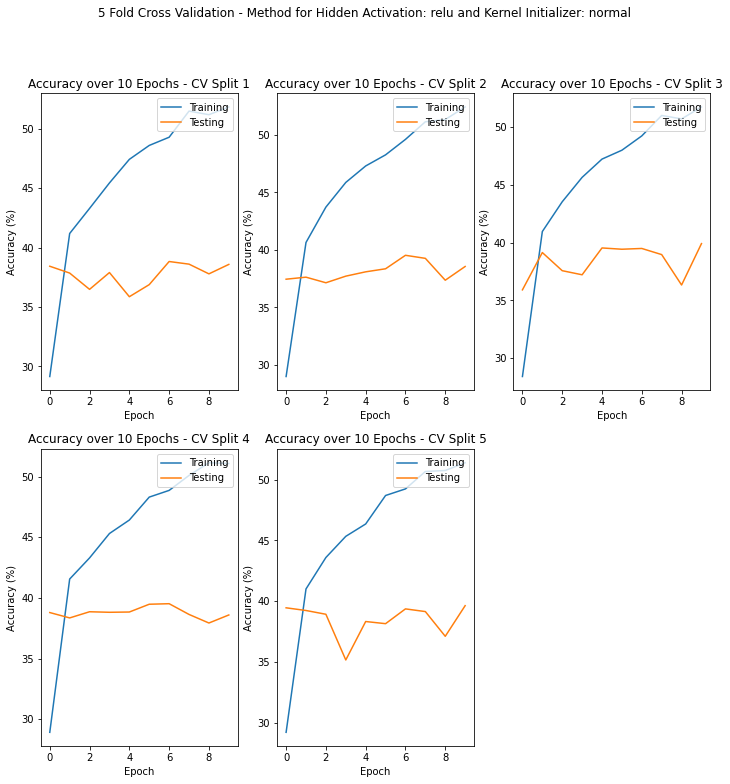

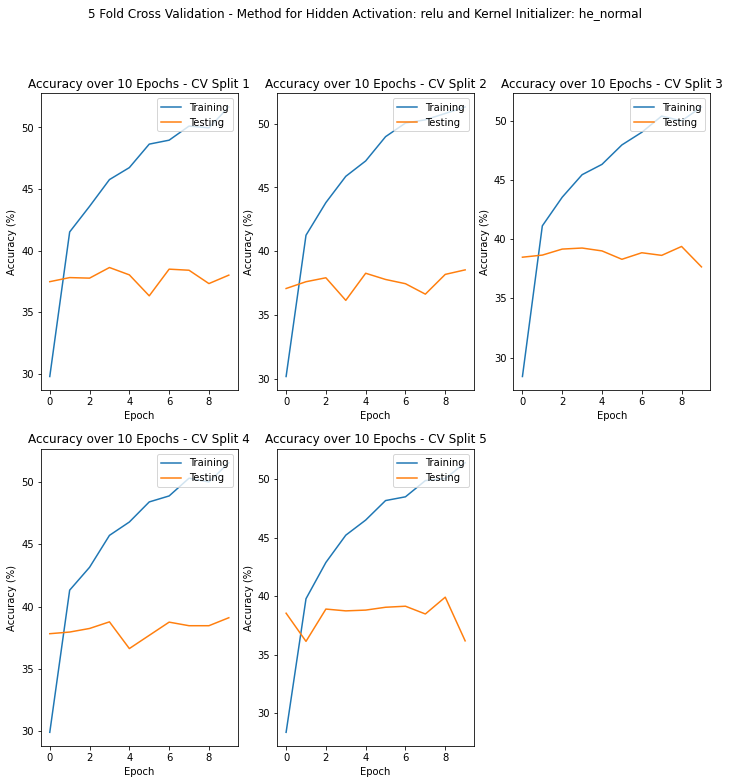

The most accurate set of hyperparameters is:
Activation: sigmoid
Kernel Initializer: normal
Validation Accuracy: 40.6940758228302



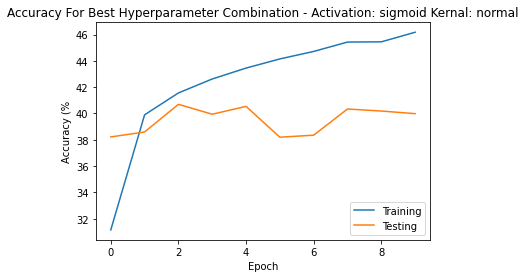

In [ ]:
# This function performs hyperparameter tuning on the neural network in terms of its activation function and kernel initializer for the single hidden layer
def simpleNNClassification(X, y):

    num_input = X.shape[1] # 956 dimensions
    num_output = 100 # 100 output neurons for decimal tenths for ratings from 0.0-10.0
    num_hidden = int(num_input + num_output - 0.5) # setting optimal number of hidden layer neurons from simpleNNRegression


    # Variety of hyperparameters to test different combinations of
    activation_hyperparameter = [
        'sigmoid',
        'relu'
    ]
    kernel_initializer_hyperparameters = [
        'normal',
        'he_normal'
    ]


    results = []

    for activation in activation_hyperparameter:
        for kernel_initializer in kernel_initializer_hyperparameters:

            plt.figure(figsize=(12,12))
            plt.suptitle("5 Fold Cross Validation - Method for Hidden Activation: " + activation + " and Kernel Initializer: " + kernel_initializer)
            subplot_idx = 1
            kf = KFold(n_splits=5, random_state=True, shuffle=True) # 5-fold cross validation
            kfold_results = {}
            for training_idx, testing_idx in kf.split(X):
                
                X_train, X_test = X.iloc[training_idx], X.iloc[testing_idx]
                y_train, y_test = y.iloc[training_idx], y.iloc[testing_idx]

                # Encode rating range 0.0-10.0 over 100 classes
                y_train = to_categorical(y_train, 100)
                y_test = to_categorical(y_test, 100)
                
                # scale the data
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                model = keras.Sequential([
                    keras.layers.Dense(num_hidden, input_dim=num_input, activation=activation, kernel_initializer=kernel_initializer), # hidden layer
                    keras.layers.Dense(num_output, activation="softmax") # 100 classes output layer
                ])

                model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

                accuracies = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # save the model history for later
                
                # scale accuracy up to 0-100
                accuracies['accuracy'] = [i * 100 for i in accuracies['accuracy']]
                accuracies['val_accuracy'] = [i * 100 for i in accuracies['val_accuracy']] 
            
                accuracy = max(accuracies['val_accuracy'])
                kfold_results['cv_split_' + str(subplot_idx)] = {'accuracy': accuracy, 'activation': activation, 'kernel_initializer': kernel_initializer,'train_accuracy': accuracies['accuracy'], 'val_accuracy': accuracies['val_accuracy']}

                #Plot the training and testing accuracies over the 10 epochs
                plt.subplot(2,3,subplot_idx)
                plt.plot(accuracies['accuracy'])
                plt.plot(accuracies['val_accuracy'])
                plt.legend(['Training', 'Testing'], loc='upper right')
                plt.title('Accuracy over 10 Epochs - CV Split ' + str(subplot_idx))
                plt.ylabel('Accuracy (%)')
                plt.xlabel('Epoch')
                
                subplot_idx += 1
                

            plt.draw()
            
            # save the top validation accuracy for later
            method_result = dict(sorted(kfold_results.items(), key=lambda result: result[1]['accuracy'], reverse=True))
            method_result = list(method_result.values())[0]
            results.append(method_result)
            

    plt.show()
    
    best_method = max(results, key=lambda result: result['accuracy']) # find the best hyperparameters
    print("The most accurate set of hyperparameters is:")
    print("Activation: "+ best_method['activation'])
    print("Kernel Initializer: "+ best_method['kernel_initializer'])
    print("Validation Accuracy: "+ str(best_method['accuracy']))
    print()

    # Plot the best 5-fold split of the best hyperparameters
    plt.plot(best_method['train_accuracy'])
    plt.plot(best_method['val_accuracy'])
    plt.legend(['Training', 'Testing'], loc='lower right')
    plt.title('Accuracy For Best Hyperparameter Combination - Activation: ' + best_method['activation'] + ' Kernal: ' + best_method['kernel_initializer'])
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epoch')
    plt.show()

simpleNNClassification(X, y)

Epoch 1/10
8/8 [==============================] - 3s 269ms/step - loss: 0.6409 - accuracy: 0.0504 - val_loss: 0.2189 - val_accuracy: 0.2917
Epoch 2/10
8/8 [==============================] - 1s 195ms/step - loss: 0.2206 - accuracy: 0.2351 - val_loss: 0.1653 - val_accuracy: 0.3579
Epoch 3/10
8/8 [==============================] - 1s 190ms/step - loss: 0.1653 - accuracy: 0.3007 - val_loss: 0.1310 - val_accuracy: 0.3454
Epoch 4/10
8/8 [==============================] - 1s 183ms/step - loss: 0.1307 - accuracy: 0.3076 - val_loss: 0.1055 - val_accuracy: 0.3553
Epoch 5/10
8/8 [==============================] - 1s 182ms/step - loss: 0.1050 - accuracy: 0.3282 - val_loss: 0.0866 - val_accuracy: 0.3558
Epoch 6/10
8/8 [==============================] - 1s 195ms/step - loss: 0.0851 - accuracy: 0.3482 - val_loss: 0.0702 - val_accuracy: 0.3806
Epoch 7/10
8/8 [==============================] - 1s 189ms/step - loss: 0.0697 - accuracy: 0.3538 - val_loss: 0.0594 - val_accuracy: 0.3223
Epoch 8/10
8/8 [====

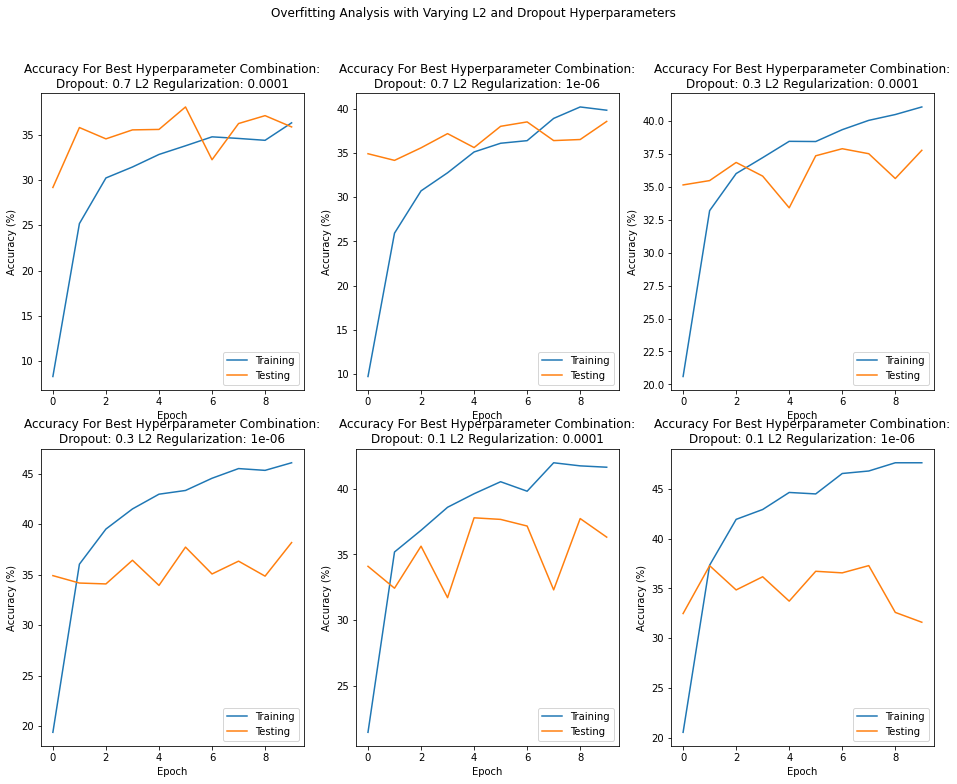

In [ ]:
# This function attempts to improve the overfitting occuring in simpleNNClassification by hyperparameter tuning L2 regularization and Dropout layer paramaters on the hidden layer
def overfittingAnalysis(X, y):

    num_input = X.shape[1] # 956 dimensions
    num_output = 100 # 100 output neurons for decimal tenths for ratings from 0.0-10.0
    num_hidden = int(num_input + num_output - 0.5)

    # setting optimal hyperparameters from simpleNNClassification
    activation = 'sigmoid' 
    kernel_initializer = 'normal'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # split the dataset into training and testing

    # Encode rating range 0.0-10.0 over 100 classes
    y_train = to_categorical(y_train, 100)
    y_test = to_categorical(y_test, 100)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Hyperparameters for tuning
    l2_regularizers = [0.0001, 0.000001]
    dropouts = [0.7, 0.3, 0.1]

    plt.figure(figsize=(16,12))
    plt.suptitle("Overfitting Analysis with Varying L2 Regularization and Dropout Hyperparameters")

    subplot_idx = 1
    for dropout_value in dropouts:
        for l2_value in l2_regularizers:
            
            # Create the NN
            model = keras.Sequential([
                keras.layers.Dense(num_hidden, input_dim=num_input, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(l2_value)),
                keras.layers.Dropout(dropout_value),
                keras.layers.Dense(num_output, activation="softmax") # 100 classes output layer
            ])
            
            model.compile(loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

            accuracies = model.fit(X_train, y_train, epochs=10, batch_size=num_input, validation_data=(X_test, y_test)).history # record the model's history over 10 epochs

            # scale accuracy up to 0-100
            accuracies['accuracy'] = [i * 100 for i in accuracies['accuracy']]
            accuracies['val_accuracy'] = [i * 100 for i in accuracies['val_accuracy']] 

            #Plot the model's training and testing accuracies over 10 epochs
            plt.subplot(2,3,subplot_idx)
            plt.plot(accuracies['accuracy'])
            plt.plot(accuracies['val_accuracy'])
            plt.legend(['Training', 'Testing'], loc='lower right')
            plt.title('Accuracy For Best Hyperparameter Combination:\nDropout: ' + str(dropout_value) + ' L2 Regularization: ' + str(l2_value))
            plt.ylabel('Accuracy (%)')
            plt.xlabel('Epoch')
            
            subplot_idx += 1
            
    plt.show()


overfittingAnalysis(X,y)